In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
movies = pd.read_csv('data/movies_data.csv',index_col=['tconst'])

movies = movies.drop('Unnamed: 0',axis=1)

movies['numVotes'] = movies['numVotes'].astype('int')

movies = movies.dropna(subset='startYear')

movies['startYear'] = movies['startYear'].astype('int')

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324774 entries, tt0000009 to tt9916730
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   primaryTitle    324774 non-null  object 
 1   originalTitle   324774 non-null  object 
 2   isAdult         324774 non-null  int64  
 3   startYear       324774 non-null  int64  
 4   runtimeMinutes  291709 non-null  float64
 5   genres          313876 non-null  object 
 6   averageRating   324774 non-null  float64
 7   numVotes        324774 non-null  int64  
 8   directors       320731 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 24.8+ MB


In [49]:
movies.head()

,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directors
tconst,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,0,1894,45.0,Romance,5.4,218,Alexander Black
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100.0,"Documentary,News,Sport",5.3,549,Enoch J. Rector
tt0000502,Bohemios,Bohemios,0,1905,100.0,NaN,3.8,20,Ricardo de Baños
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70.0,"Action,Adventure,Biography",6.0,969,Charles Tait
tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90.0,Drama,5.6,30,Michel Carré


In [50]:
bins = [1800,
    1900,
    1910,
    1920,
    1930,
    1940,
    1950,
    1960,
    1970,
    1980,
    1990,
    2000,
    2010,
    2020,
    2030
 ]

labels = [
    "<1900",
    '1900',
    '1910',
    '1920',
    '1930',
    '1940',
    '1950',
    '1960',
    '1970',
    '1980',
    '1990',
    '2000',
    '2010',
    '2020'
    ]

movies['decades'] = pd.cut(movies['startYear'],bins=bins,labels=labels)


#### Analise de tendências por décadas:
- Como variou a quantidade de filmes produzidos?
- Como variou o tempo médio de duração de um filme?
- Existe variações no rating média dos filmes?

In [51]:
movie_by_dec = movies.groupby('decades').agg({'primaryTitle': 'count', 'runtimeMinutes':'mean', 'averageRating': 'mean'}).reset_index()
movie_by_dec

,decades,primaryTitle,runtimeMinutes,averageRating
0,<1900,12,76.666667,4.200000
1,1900,117,68.000000,4.491453
2,1910,2408,73.407207,5.833306
3,1920,4593,79.471679,6.062378
4,1930,9794,80.715201,6.109567
5,1940,9364,86.407146,6.178289
6,1950,13543,92.795822,6.170811
7,1960,18383,95.071949,6.067883
8,1970,23537,94.257581,5.901563
9,1980,26952,96.680915,5.904886


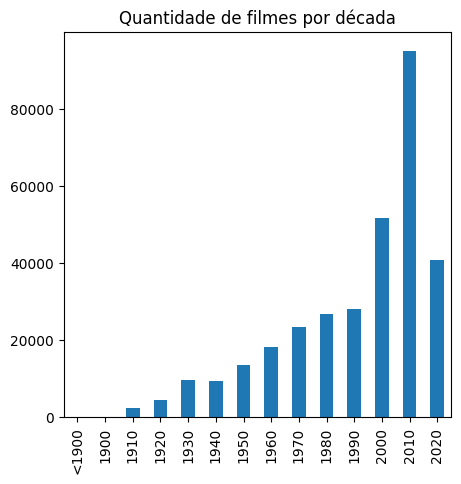

In [52]:
ax = movie_by_dec.plot.bar('decades','primaryTitle',legend=False,figsize=(5,5),title='Quantidade de filmes por década',xlabel='')

Desde a criação do cinema em 1895 a quantidade de filmes produzidos vem aumentando continuamente.  

<Axes: title={'center': 'Evolução da taxa de crescimento dos filmes por década'}, xlabel='Décadas', ylabel='Taxa de Crescimento em %'>

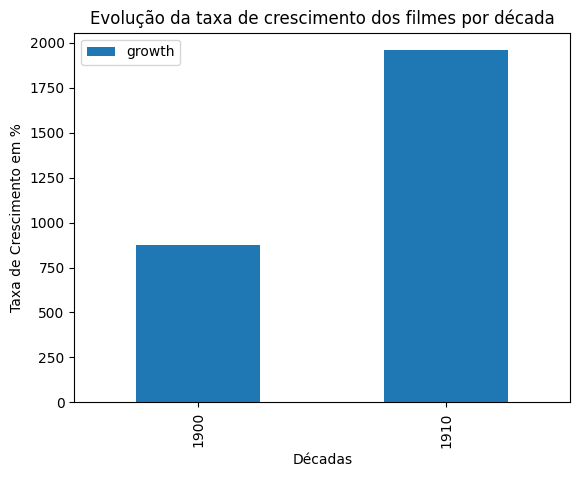

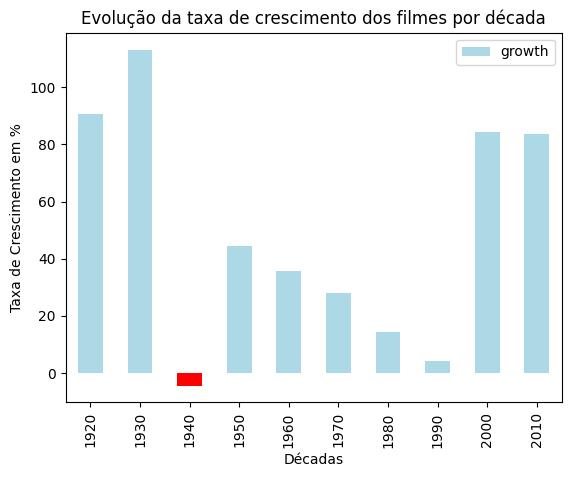

In [53]:
movie_growth = movie_by_dec.loc[movie_by_dec['decades'] != '2020',['decades','primaryTitle']]


movie_growth['shifted'] = movie_growth['primaryTitle'].shift(periods=1)

movie_growth = movie_growth.dropna()


movie_growth['growth'] = (movie_growth['primaryTitle']/movie_growth['shifted'] - 1)*100


pre_1920 = movie_growth[movie_growth['decades'].isin(['1900','1910'])]
pos_1920 = movie_growth[~movie_growth['decades'].isin(['1900','1910'])]

colors_diff = ['red' if val < 0 else 'lightblue' for val in pos_1920['growth']]


pre_1920.plot.bar(x='decades',y='growth',xlabel='Décadas',ylabel='Taxa de Crescimento em %',title='Evolução da taxa de crescimento dos filmes por década')
pos_1920.plot.bar(x='decades',y='growth',xlabel='Décadas',ylabel='Taxa de Crescimento em %',title='Evolução da taxa de crescimento dos filmes por década', color=colors_diff)


A taxa de crescimento mostra que no último século tem havido um aumento quase continuo da quantidade de filmes produzido. A partir dos gráficos podemos tirar alguns insights: 
- A grande explosão do cinema ocorreu na décadas de 1900 e 1910. 
- Na década de 40 existiu um leve declino na produção de filmes.
- De 1950 até 1990 houve um decrescimo da taxa de crescimento na produção de filmes.

runtimeMinutes    Axes(0.125,0.11;0.775x0.77)
dtype: object

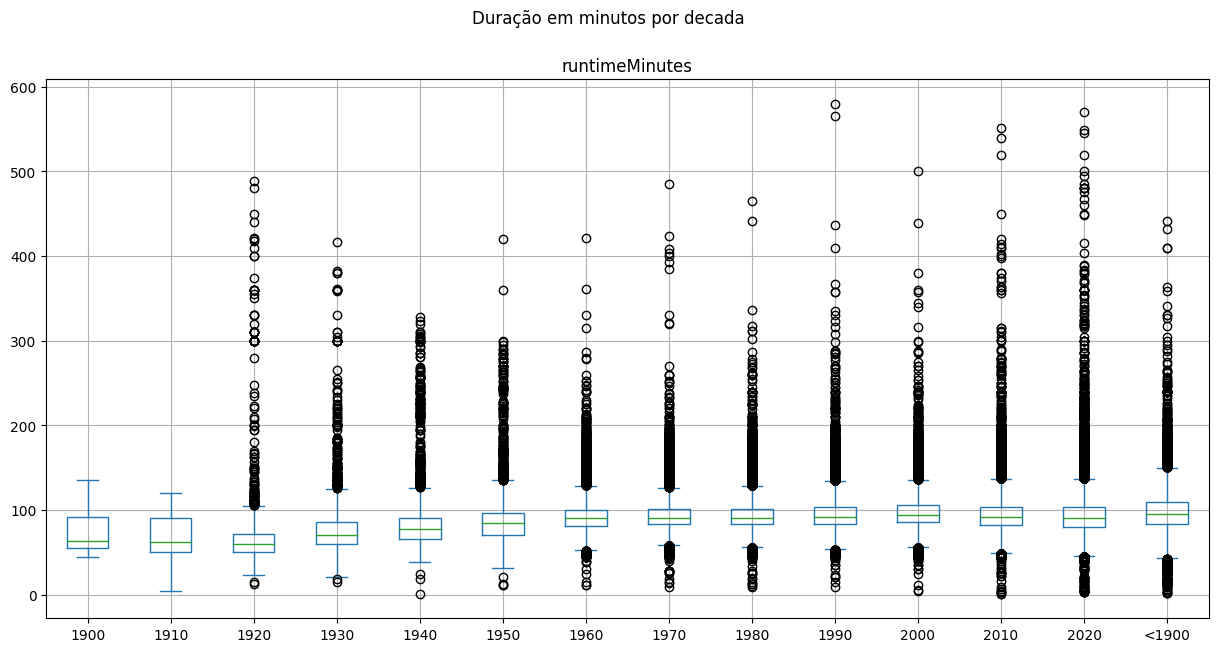

In [54]:
movies.loc[(movies['runtimeMinutes'] < 600) & (movies['runtimeMinutes'] > 0)].plot.box(column='runtimeMinutes',by='decades',figsize=(15,7), grid=True, title='Duração em minutos por decada')

Podemos verificar que a duração média do filmes foi aumentando continuamente até atingir um platô em 1960 e permanecer próximo ao tempo de 1 hora e 40 minutos, entretanto é possivel verificar que existe grande variabilidade na duração do filmes. 

In [55]:


def pivot_table_barh_plot_decade(df,color='blue',topn=5,title='',xlabel='',ylabel='',nrows=7,ncols=2,figsize=(14,28)):
    decades = df.columns

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)  
    axes = axes.flatten() 

    for i, decade in enumerate(decades):
        top_genres = df[decade].sort_values(ascending=False).head(topn)

        axes[i].barh(top_genres.index, top_genres.values, color=color)
        
        axes[i].set_title(f'{title} - {decade}')

        axes[i].invert_yaxis()
            
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)

    plt.tight_layout()

    plt.show()

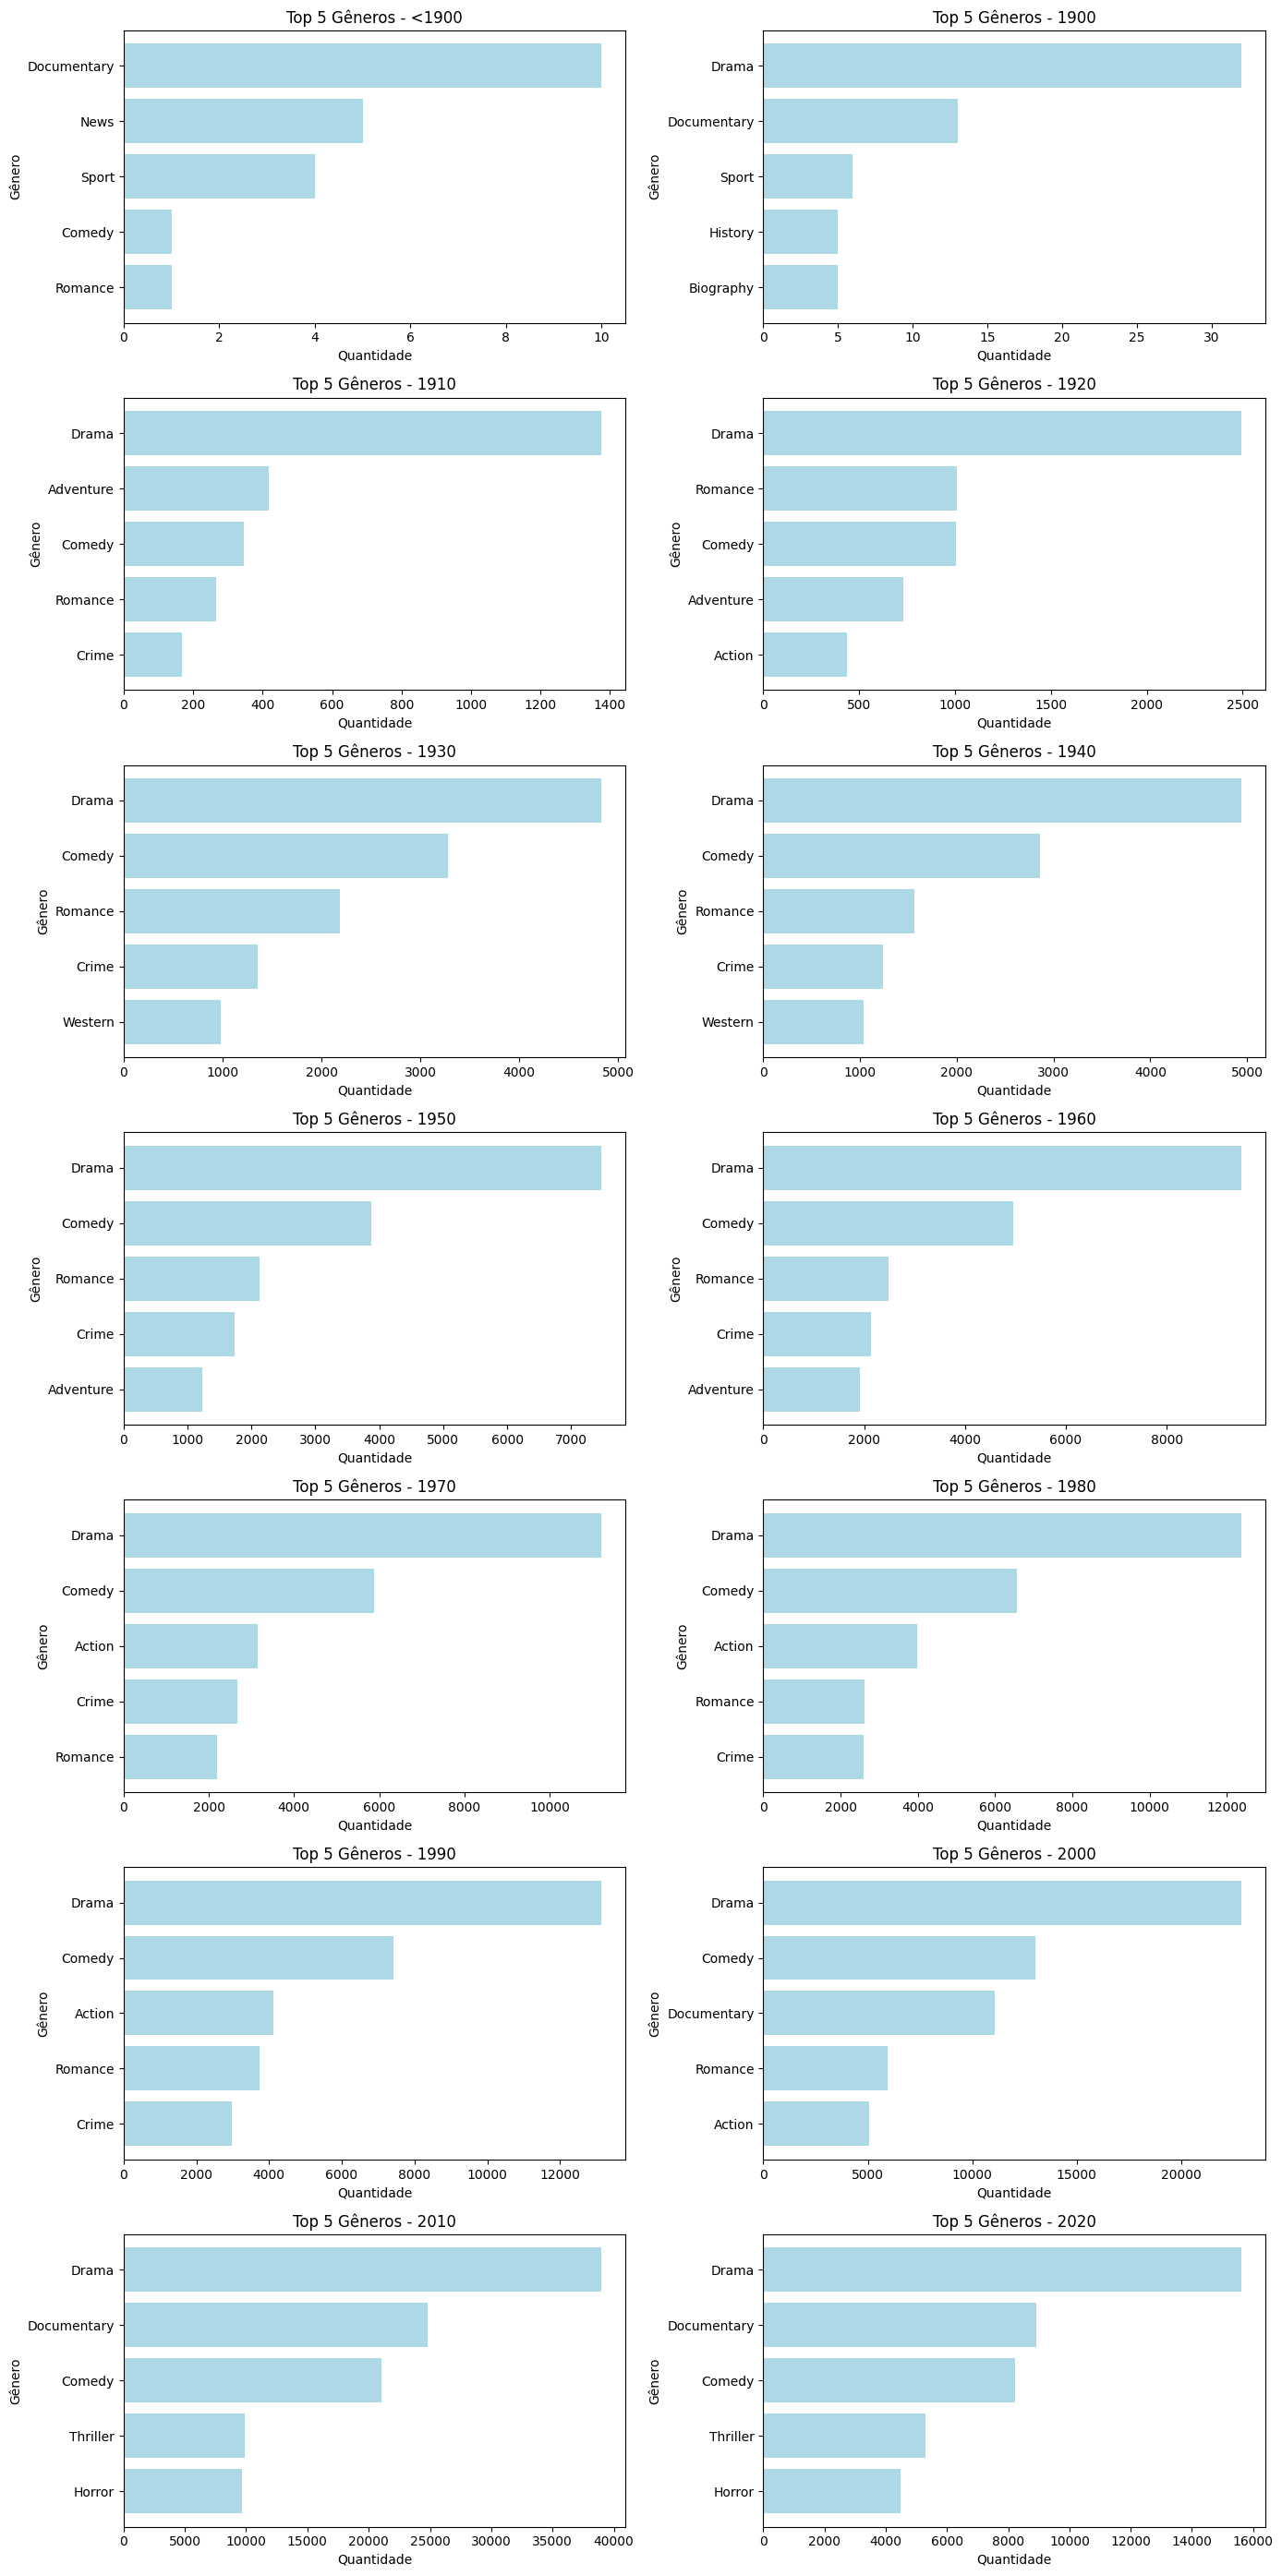

In [56]:
movies_filtered = movies.loc[~pd.isna(movies['genres']),['decades','genres']]

movies_filtered.loc[:,'genres'] = movies_filtered.loc[:,'genres'].str.split(',')

movies_filtered = movies_filtered.explode('genres').reset_index()

movies_pivot = pd.pivot_table(movies_filtered,values='tconst',index=['genres'],columns=['decades'],aggfunc='count')

pivot_table_barh_plot_decade(movies_pivot,'lightblue',5,'Top 5 Gêneros','Quantidade','Gênero')

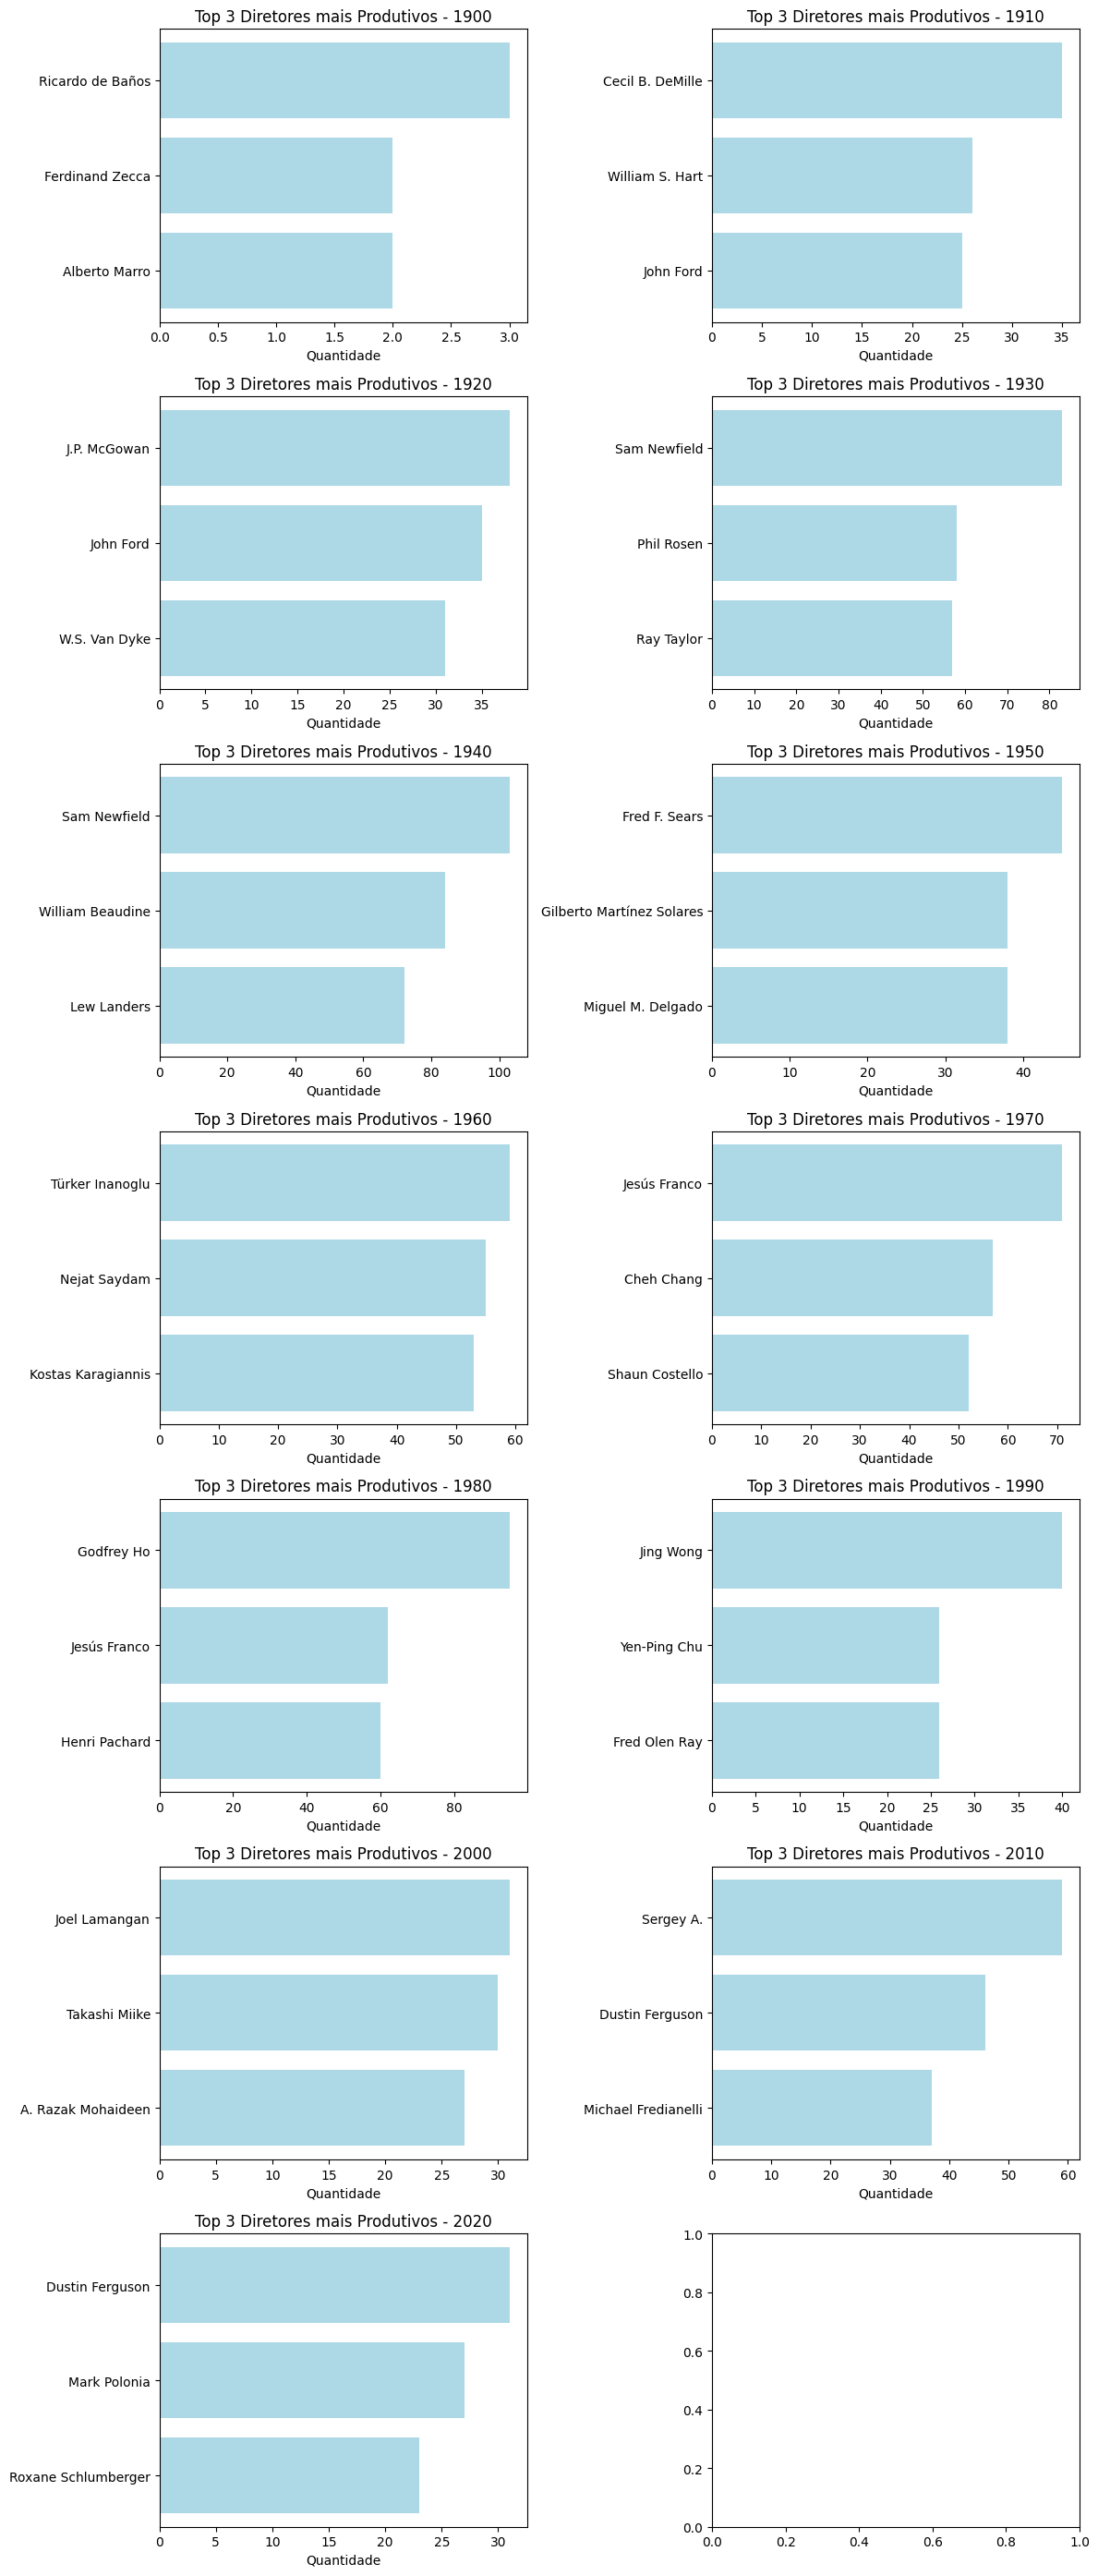

In [63]:
directors_filtered = movies.loc[(~pd.isna(movies['directors']))&(movies['runtimeMinutes'] > 40)&(movies['decades'] != '<1900'),['decades','directors']]

directors_filtered.loc[:,'directors'] = directors_filtered.loc[:,'directors'].str.split(',')

directors_filtered = directors_filtered.explode('directors').reset_index()

directors_pivot = pd.pivot_table(directors_filtered,values='tconst',index=['directors'],columns=['decades'],aggfunc='count') 

directors_pivot = directors_pivot.drop('<1900',axis=1)

pivot_table_barh_plot_decade(directors_pivot,'lightblue',3,'Top 3 Diretores mais Produtivos','Quantidade','',7,2,(12,28))

In [73]:
movies['numVotes'].mean(), movies['numVotes'].quantile(q=0.25), movies['numVotes'].quantile(q=0.75)

(3629.751713499233, 19.0, 314.0)

In [74]:
movies['numVotes'].mean()

3629.751713499233